In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
MODELS = [DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, SVR, NuSVR, MLPRegressor,
          LinearRegression, BayesianRidge, DecisionTreeRegressor, KNeighborsRegressor, XGBRegressor, XGBRFRegressor]

In [3]:
housing = pd.read_csv(r'./datasets/kc_house_data.csv').sample(5000)
quality = pd.read_csv(r'./datasets/winequality-red.csv')

In [4]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2288,3205100060,20150413T000000,517100.0,3,1.75,1580,9719,1.0,0,0,...,7,1580,0,1962,0,98056,47.5396,-122.180,1760,8539
6334,1426300842,20150428T000000,455850.0,3,2.25,1820,6000,1.0,0,0,...,7,1120,700,1964,0,98108,47.5684,-122.300,1970,6232
11716,705710640,20150302T000000,319950.0,3,2.50,1700,7000,2.0,0,0,...,7,1700,0,1996,0,98038,47.3798,-122.025,1950,7000
12673,3758900150,20140826T000000,425000.0,2,1.00,1430,13300,1.5,0,0,...,6,1230,200,1921,0,98033,47.6996,-122.203,1950,11421
4467,3330500705,20140515T000000,197500.0,3,1.00,980,3090,1.5,0,0,...,6,980,0,1903,0,98118,47.5525,-122.277,980,3090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20362,3449850050,20140620T000000,420000.0,5,3.00,2630,3149,2.0,0,0,...,8,1670,960,2013,0,98056,47.5065,-122.171,2240,4825
6373,2163300130,20141001T000000,386000.0,5,2.50,2740,12413,2.0,0,0,...,7,2740,0,1990,0,98031,47.4199,-122.183,1900,7416
20828,357000135,20150218T000000,1900000.0,4,2.50,3070,7830,2.0,0,2,...,11,1970,1100,2009,0,98144,47.5930,-122.291,2440,4682
17519,7518502210,20140530T000000,645500.0,2,1.00,1890,5202,1.5,0,0,...,7,1890,0,1909,0,98117,47.6786,-122.379,1670,5100


In [5]:
quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2288 to 17755
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  long

In [7]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
def metrics(tt, tp, vt, vp, model, time=None): return {
    "model": model,
    'time': time,
    "mse": (mean_squared_error(tt, tp),
            mean_squared_error(vt, vp)),
    'r2': (r2_score(tt, tp),
           r2_score(vt, vp))
}


def create_model(X, y, model_name, time_it: bool=False):
    model = Pipeline([
        ('scaler1', RobustScaler()),
        ('scaler2', MinMaxScaler()),
        ('model', model_name())
    ])
    if time_it == True:
        begin = time.time()
        model.fit(X, y)
        end = time.time()
        return (model, end - begin)
    return model.fit(X, y)


def get_metrics(X, y, model_name):
    Xt, Xv, yt, yv = train_test_split(X, y, train_size=.7)
    results = create_model(Xt, yt, model_name, time_it=True)
    model, time = results[0], results[1]
    return metrics(
        yt, model.predict(Xt), yv, 
        model.predict(Xv), model_name, time)
    
    
def get_results(X, y, models): return [get_metrics(
    X, y, i) for i in models]

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2288 to 17755
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   int64  
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  long

In [10]:
quality_X =  quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode', 
            'lat', 'long', 'price'], axis=1)
housing_y = housing['price']

In [11]:
housing_y

2288      517100.0
6334      455850.0
11716     319950.0
12673     425000.0
4467      197500.0
           ...    
20362     420000.0
6373      386000.0
20828    1900000.0
17519     645500.0
17755     765000.0
Name: price, Length: 5000, dtype: float64

In [12]:
quality_results = get_results(quality_X, quality_y, MODELS)
housing_results = get_results(housing_X, housing_y, MODELS)

c:\Users\Admin\Desktop\aitfdl\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Admin\Desktop\aitfdl\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
quality_results

[{'model': sklearn.tree._classes.DecisionTreeRegressor,
  'time': 0.018996715545654297,
  'mse': (0.0, 0.6895833333333333),
  'r2': (1.0, -0.008147414909007944)},
 {'model': sklearn.ensemble._forest.RandomForestRegressor,
  'time': 0.5740067958831787,
  'mse': (0.045171939231456654, 0.3769545833333333),
  'r2': (0.9285285056861259, 0.45976502201985514)},
 {'model': sklearn.ensemble._weight_boosting.AdaBoostRegressor,
  'time': 0.15299677848815918,
  'mse': (0.3498263127436554, 0.44676778902437386),
  'r2': (0.456206313416598, 0.3338555914212956)},
 {'model': sklearn.ensemble._gb.GradientBoostingRegressor,
  'time': 0.23099780082702637,
  'mse': (0.2339760213666668, 0.3807531184669487),
  'r2': (0.6488390963381458, 0.3836037205256817)},
 {'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor,
  'time': 0.8649981021881104,
  'mse': (0.04678190002465938, 0.37898418486732305),
  'r2': (0.9283193010438178, 0.41655782310950673)},
 {'model': sklearn

In [14]:
housing_results

[{'model': sklearn.tree._classes.DecisionTreeRegressor,
  'time': 0.04999589920043945,
  'mse': (8835464.285714285, 80434530315.48866),
  'r2': (0.9999391075982934, 0.3484813457312571)},
 {'model': sklearn.ensemble._forest.RandomForestRegressor,
  'time': 2.155998945236206,
  'mse': (4564752385.1418, 50122221701.88292),
  'r2': (0.9633264292660121, 0.7076826821658927)},
 {'model': sklearn.ensemble._weight_boosting.AdaBoostRegressor,
  'time': 0.3300058841705322,
  'mse': (70566585840.77075, 101573230695.48856),
  'r2': (0.43414712400124733, 0.40598259752393306)},
 {'model': sklearn.ensemble._gb.GradientBoostingRegressor,
  'time': 0.6779909133911133,
  'mse': (22166058950.293503, 34167714173.53704),
  'r2': (0.843215930266233, 0.7413366206411651)},
 {'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor,
  'time': 0.981992244720459,
  'mse': (15855943425.279825, 40041949172.72158),
  'r2': (0.887763388701361, 0.697550971474809)},
 {'model': s

In [18]:
def plot_results(results: 'list[dict]'):
    y = [i['model'] for i in results]
    times, mse, r2 = [i['time'] for i in results], [i['mse'][1] for i in results], [i['r2'][1] for i in results]
    plt.barh(times, mse, r2, align='center',)
    plt.yticks(np.arange(len(y)), y)
    plt.title('Metrics')
    plt.legend()
    plt.show()

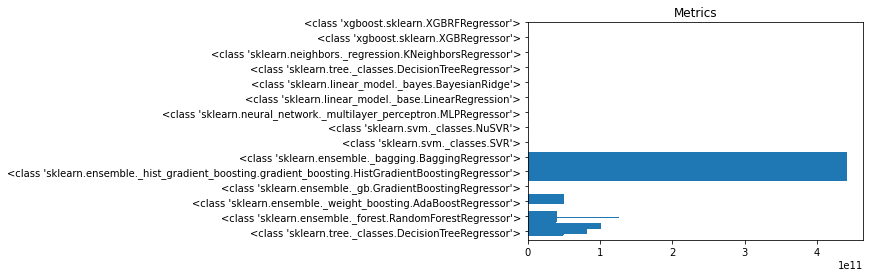

In [19]:
%matplotlib inline
y = [i['model'] for i in housing_results]
times, mse, r2 = [i['time'] for i in housing_results], [i['mse'][1] for i in housing_results], [i['r2'][1] for i in housing_results]
plt.barh(times, mse, r2, align='center',)
plt.yticks(np.arange(len(y)), y)
plt.title('Metrics')
plt.show()